In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

movies=pd.read_csv('http://bit.ly/imdbratings')
drinks=pd.read_csv('http://bit.ly/drinksbycountry')
ufo=pd.read_csv('http://bit.ly/uforeports')
chip=pd.read_table('http://bit.ly/chiporders')
mvuser=pd.read_table('http://bit.ly/movieusers')



## Controlling style and context aesthetics

In [2]:
%matplotlib inline
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

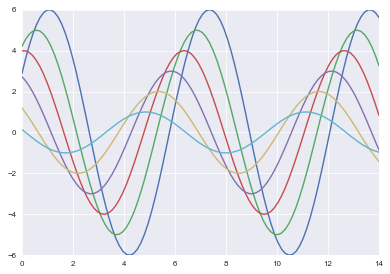

In [37]:
sns.set_style('darkgrid')
sns.set_context('paper')   # paper, talk, poster, notebook
sinplot()
sns.despine()

## Choosing color palettes

**`Categorical color palettes`**
1. hls
2. husl
3. Paired  (color brewer palette)
4. set2    (color brewer palette)

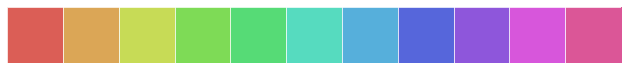

In [40]:
sns.palplot(sns.color_palette('hls',11))

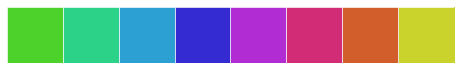

In [48]:
sns.palplot(sns.hls_palette(8,h=0.3,l=0.5))

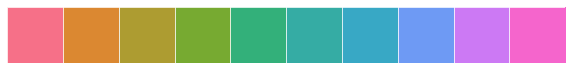

In [51]:
sns.palplot(sns.color_palette('husl',10))  # or  sns.palplot(husl_palette(10))

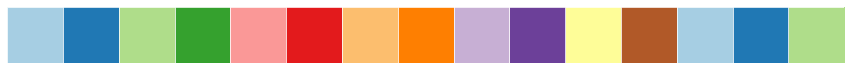

In [58]:
sns.palplot(sns.color_palette('Paired',15))   #cycling colors

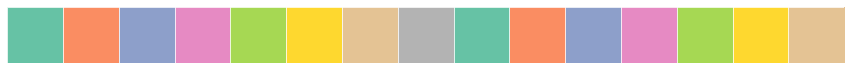

In [59]:
sns.palplot(sns.color_palette('Set2',15))    # cycling colors

## Sequential color palette
Also check:
1. ligtht_palette()
2. dark_palette()

Examples of color palettes: BrBG, RdBu, coolwarm
for customizing of sequential color palettes

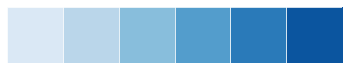

In [66]:
sns.palplot(sns.color_palette('Blues'))

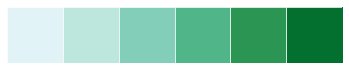

In [67]:
sns.palplot(sns.color_palette('BuGn'))

### Diverging color palette

Customize palette with function **`diverging_palette()`**

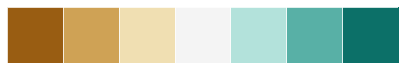

In [70]:
sns.palplot(sns.color_palette("BrBG", 7))

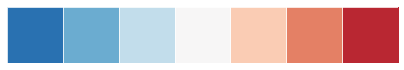

In [71]:
sns.palplot(sns.color_palette("RdBu_r", 7))

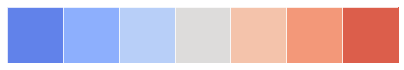

In [72]:
sns.palplot(sns.color_palette("coolwarm", 7))

## Example use of color_palette() and set_palette()
1. Use `color_palette()` in conjuction with `palplot` to view various color palettes
2. Use `set_palette()` to set a color palette which automatically is used for plot it preceeds


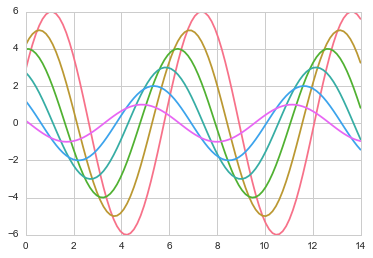

In [28]:
sns.set_style('whitegrid')
sns.despine(trim=True)
sns.set_palette('husl')
sinplot()

In [13]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


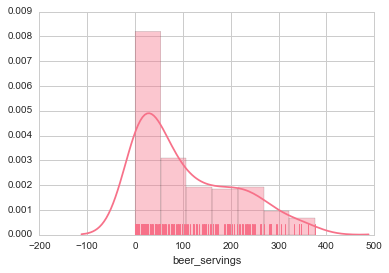

In [29]:
# histogram and kde
sns.distplot(drinks.beer_servings, rug=True)

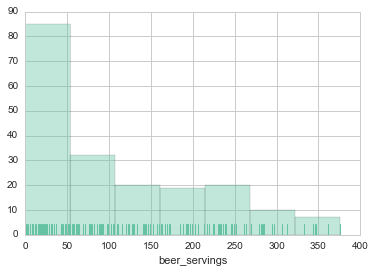

In [34]:
# histogram 
sns.set_palette('BuGn',1)
sns.distplot(drinks.beer_servings,kde=False, rug=True)

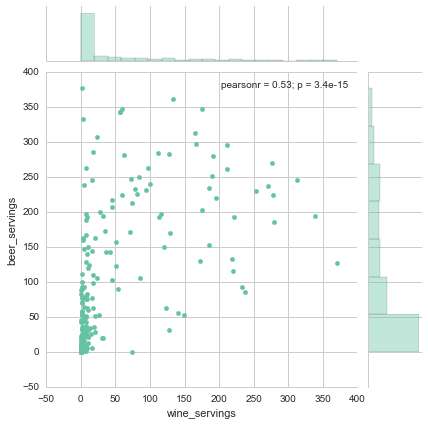

In [38]:
# Visualizing the relationship between numerical variable
sns.jointplot('wine_servings','beer_servings',data=drinks)

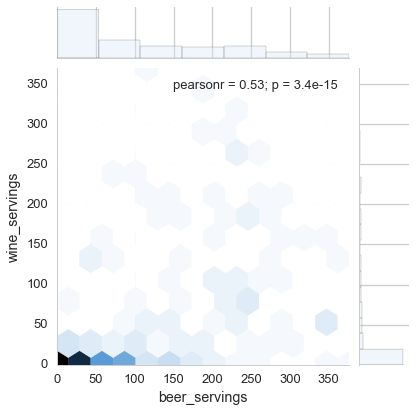

In [42]:
# Hexabin plot of bivariates
sns.set_context('talk')
sns.set_palette('Blues')
sns.jointplot('beer_servings','wine_servings',drinks,kind='hex')

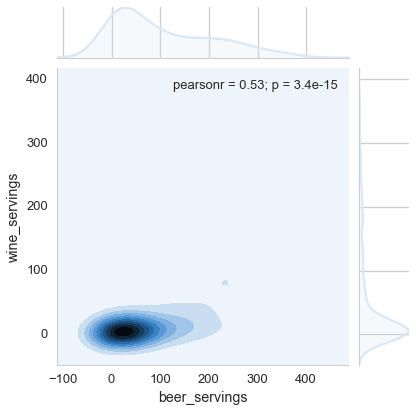

In [43]:
#kde plot of bivariates
sns.set_context('talk')
sns.set_palette('Blues')
sns.jointplot('beer_servings','wine_servings',drinks,kind='kde')

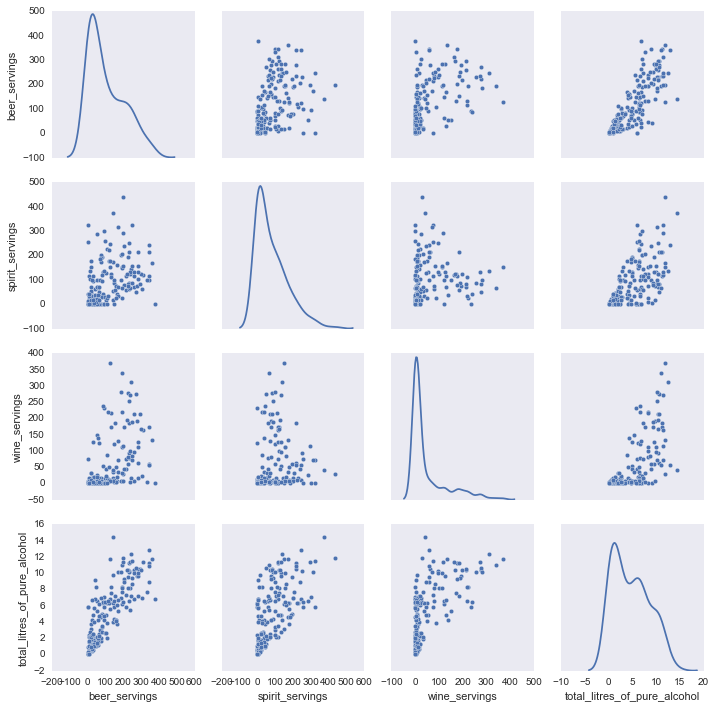

In [52]:
sns.set()
with sns.axes_style('dark'):
    sns.pairplot(drinks.iloc[:,1:drinks.shape[1]-1],diag_kind='kde')

## Visualizing linear relationships

1. regplot
2. lmplot

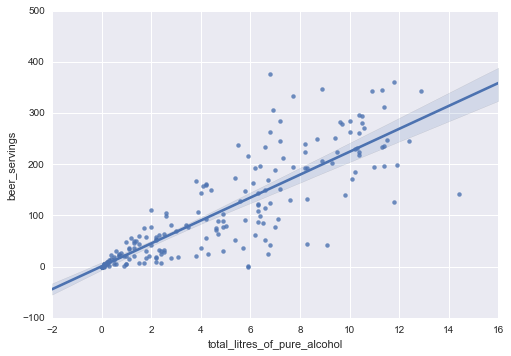

In [53]:
sns.regplot('total_litres_of_pure_alcohol','beer_servings',data=drinks)

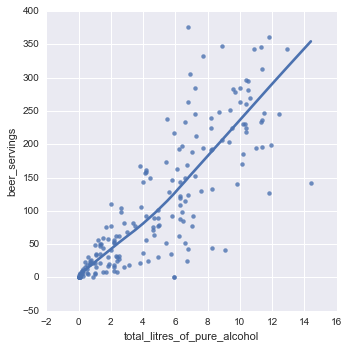

In [60]:
with sns.plotting_context('notebook'):
    sns.lmplot('total_litres_of_pure_alcohol','beer_servings',data=drinks, lowess=True)

### Checking to see if the residuals are normaly distributed for a linear model

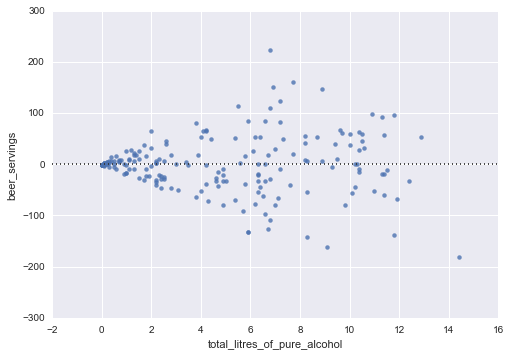

In [61]:
sns.residplot('total_litres_of_pure_alcohol','beer_servings',data=drinks)

Often times it is worth exploring the effect of a third variable on the relationship between two variables
Next we do that.

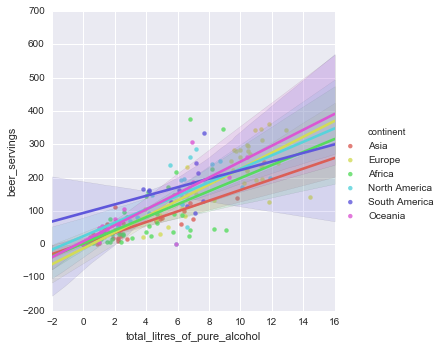

In [66]:
sns.lmplot('total_litres_of_pure_alcohol','beer_servings',data=drinks, hue='continent',palette='hls')

In [67]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [ ]:
sns.lmplot('duration','star_rating',data=movies,y_jitter=0.1,x_jitter=0.1,hue='content_rating',row='genre')

## Visualizing quatitative variable in various factor levels

#### Categorical Scatter plot

In [52]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

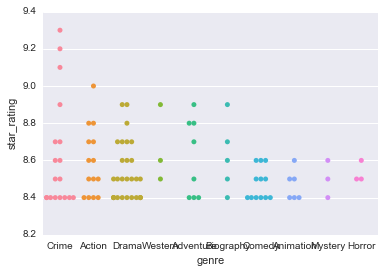

In [61]:
sns.swarmplot('genre','star_rating',data=movies.iloc[:100,:])


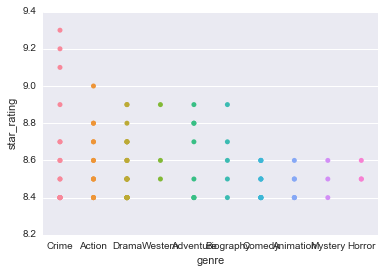

In [62]:
sns.stripplot('genre','star_rating',data=movies.iloc[:100,:])


### Distribution of numerical in each category

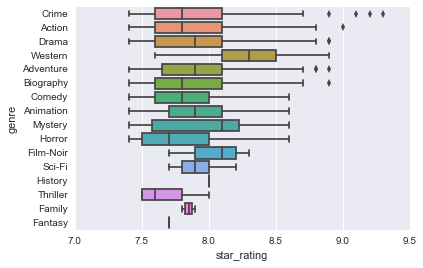

In [64]:
sns.boxplot('star_rating','genre',data=movies)

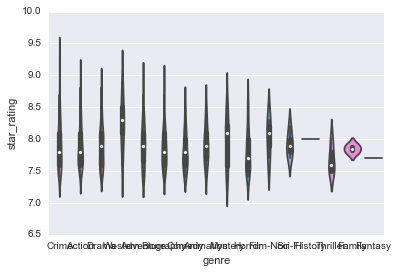

In [66]:
sns.violinplot('genre','star_rating',data=movies)